# Explore here

In [102]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

print(f'El ID es: "{client_id}"')

El ID es: "67cb9d5e66824ca9baa58ac432329e0d"


In [103]:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [104]:
if not client_id or not client_secret:
    print("Error: No se cargaron las credenciales. Revisa el archivo .env")
else:
    print(f"ID cargado (primeros 5 caracteres): {client_id[:5]}...")

ID cargado (primeros 5 caracteres): 67cb9...


In [105]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [110]:
load_dotenv(override=True) 

client_id = os.getenv("CLIENT_ID")


In [107]:
artist_id = "2F9pvj94b52wGKs0OqiNi2"

# Get the top tracks of an artist
results = spotify.artist_top_tracks(artist_id)

canciones = []
for track in results['tracks']:
    canciones.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': track['duration_ms'] / 60000
    })

In [115]:

tracks_df = pd.DataFrame(canciones)

print(tracks_df.head(10))

                  name  popularity  duration_min
0  Como Eran Las Cosas          74      4.008667
1       Irresponsables          73      2.603283
2              El Loco          71      3.097100
3               Putita          68      3.761767
4               Puesto          68      3.435100
5           En Privado          67      3.910433
6          Carismático          66      2.598667
7              Pijamas          66      3.498667
8                Yegua          66      2.492883
9             El Colmo          66      2.679767


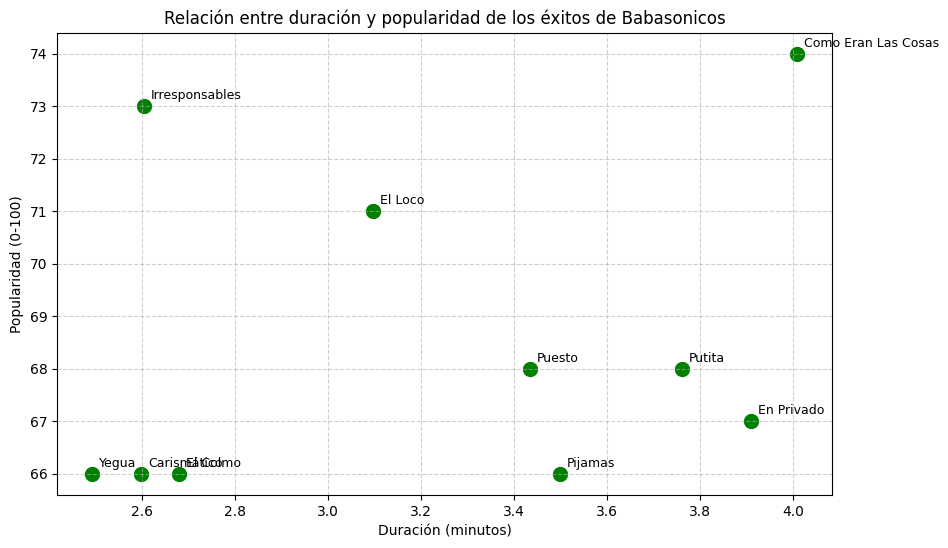

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(tracks_df['duration_min'], tracks_df['popularity'], color='green', s=100)
for i, txt in enumerate(tracks_df['name']):
    plt.annotate(txt, (tracks_df['duration_min'][i], tracks_df['popularity'][i]), 
                 xytext=(5,5), textcoords='offset points', fontsize=9)
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad (0-100)')
plt.title(f'Relación entre duración y popularidad de los éxitos de Babasonicos') 
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Conclusion
No existe una relacion directa entre la duracion de la cancion y su popularidad. 